#**ANDRES BANQUEZ CABARCAS**
**1001021432**

#**SHERLYN ANDREA GUZMAN**
**1007869053**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Cargamos el dataset train.csv

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Primero observamos cuantos datos faltantes hay, de manera que podemos manejarlos.

In [3]:
train.ID.size

692500

In [4]:
train.isnull().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64

Hay que tener en cuenta que son un total de 301468 datos, por lo que igualmente en el peor de los casos 13925 equivale unicamente al 4.61% de los datos, de manera que consideramos que agregar datos no dañara los resultados.

En este caso entonces decidimos añadir los datos faltantes en forma de la moda, esto no fue arbitrario sino fue hecho porque los datos son de tipo objeto, por lo que en varios casos realmente no representan un valor numerico.

In [5]:
train = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
train.isnull().sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64

Ahora revisamos cuales son los valores únicos de cada columna

In [6]:
train.nunique()

ID                                692500
PERIODO                                9
ESTU_PRGM_ACADEMICO                  948
ESTU_PRGM_DEPARTAMENTO                31
ESTU_VALORMATRICULAUNIVERSIDAD         8
ESTU_HORASSEMANATRABAJA                5
FAMI_ESTRATOVIVIENDA                   7
FAMI_TIENEINTERNET                     2
FAMI_EDUCACIONPADRE                   12
FAMI_EDUCACIONMADRE                   12
ESTU_PAGOMATRICULAPROPIO               2
RENDIMIENTO_GLOBAL                     4
dtype: int64

El ID y el periodo podemos no tomarlos en cuenta directamente porque no representan un efecto directo con el rendimiento global.

In [7]:
train = train.drop('ID', axis=1)
train = train.drop('PERIODO', axis=1)
train.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Los valores de matricula universidad los convertimos a numericos ordenandolos de 1 a n de menor a mayor de los gastos de matricula.

In [8]:
valores = train.ESTU_VALORMATRICULAUNIVERSIDAD.unique()
valores

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula'], dtype=object)

In [9]:
def cambio(x):
  try:
    newval = x.split(' ')[1]
    newval2 = x.split(' ')[2]
    newval = float(newval)
    if x.split(' ')[2] == 'mil':
      newval = newval/1000
    return newval
  except:
    try:
      newval = float(newval2)
      if x.split(' ')[0] == 'Menos':
        newval = .25
    except:
      return 0
    return newval
valores2 = list(map(cambio, valores))
valores2

[5.5, 2.5, 4.0, 7.0, 1.0, 0.5, 0.25, 0]

In [10]:
replacement = dict(zip(valores, valores2))
replacement

{'Entre 5.5 millones y menos de 7 millones': 5.5,
 'Entre 2.5 millones y menos de 4 millones': 2.5,
 'Entre 4 millones y menos de 5.5 millones': 4.0,
 'Más de 7 millones': 7.0,
 'Entre 1 millón y menos de 2.5 millones': 1.0,
 'Entre 500 mil y menos de 1 millón': 0.5,
 'Menos de 500 mil': 0.25,
 'No pagó matrícula': 0}

In [11]:
# utilizar este diccionario para reemplzar los valores de la columna
train['ESTU_VALORMATRICULAUNIVERSIDAD'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(replacement)
train

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# Ahora haremos lo mismo con horas trabaja semana

In [12]:
valores = train.ESTU_HORASSEMANATRABAJA.unique()
valores

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas'], dtype=object)

In [13]:
def cambio(x):
  xsplited = x.split(' ')
  if len(xsplited) == 1:
    return 0
  xsplited = list(filter(lambda x: True if str(x).isdigit() else False, map(lambda x: int(x) if x.isdigit() else x, xsplited)))
  return xsplited[0]

In [14]:
valores2 = list(map(cambio, valores))
valores2

[10, 0, 30, 21, 11]

In [15]:
replacement = dict(zip(valores, valores2))
replacement

{'Menos de 10 horas': 10,
 '0': 0,
 'Más de 30 horas': 30,
 'Entre 21 y 30 horas': 21,
 'Entre 11 y 20 horas': 11}

In [16]:
train['ESTU_HORASSEMANATRABAJA'] = train['ESTU_HORASSEMANATRABAJA'].replace(replacement)
train

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,21,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,11,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,30,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,10,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,10,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


Ahora con FAMI_ESTRATOVIVIENDA

In [17]:
valores = train.FAMI_ESTRATOVIVIENDA.unique()
valores

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'Estrato 6', 'Sin Estrato'], dtype=object)

In [18]:
valores2 = list(map(lambda x: int(x.split(' ')[1]) if x.split(' ')[1].isdigit() else 0, valores))
valores2

[3, 4, 5, 2, 1, 6, 0]

In [19]:
replacement = dict(zip(valores, valores2))
replacement

{'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 2': 2,
 'Estrato 1': 1,
 'Estrato 6': 6,
 'Sin Estrato': 0}

In [20]:
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].replace(replacement)
train

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,21,3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,11,2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,30,3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,10,3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,10,1,No,Primaria completa,Primaria completa,Si,bajo


FAMI_TIENEINTERNET y  ESTU_PAGOMATRICULAPROPIO que tienen los mismos posibles datos

In [21]:
valores1 = train.FAMI_TIENEINTERNET.unique()
valores1

array(['Si', 'No'], dtype=object)

In [22]:
valores = train.ESTU_PAGOMATRICULAPROPIO.unique()
valores

array(['No', 'Si'], dtype=object)

Ahora no será 0 y si será 1.

In [23]:
replacement = dict(zip(valores, [0,1]))
replacement

{'No': 0, 'Si': 1}

In [24]:
train['FAMI_TIENEINTERNET'] = train['FAMI_TIENEINTERNET'].replace(replacement)
train['ESTU_PAGOMATRICULAPROPIO'] = train['ESTU_PAGOMATRICULAPROPIO'].replace(replacement)

FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE que tienen los mismos tipos de dato.

In [25]:
valores = train.FAMI_EDUCACIONPADRE.unique()
valores

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica'], dtype=object)

Se seleccionan por decisión del programador cuales son los valores de educación correspondiente para cada uno de los posibles niveles encuestados, tomando NA, Ninguno y no sabe como 0.

In [26]:
educacion_numerica = {
    'No Aplica': 0,
    'Ninguno': 0,
    'No sabe': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9
}


In [27]:
train['FAMI_EDUCACIONPADRE'] = train['FAMI_EDUCACIONPADRE'].replace(educacion_numerica)
train['FAMI_EDUCACIONMADRE'] = train['FAMI_EDUCACIONMADRE'].replace(educacion_numerica)

Por ultimo (entre los que podemos convertir a numeros de manera logica) tomamos rendimiento global y lo ponemos de 1 a 4.

In [28]:
train.RENDIMIENTO_GLOBAL.unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [29]:
replacement = dict(zip(train.RENDIMIENTO_GLOBAL.unique(), [3,1,4,2]))
replacement

{'medio-alto': 3, 'bajo': 1, 'alto': 4, 'medio-bajo': 2}

In [30]:
train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].replace(replacement)
train.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,3,1,5,9,0,3
1,DERECHO,ATLANTICO,2.5,0,3,0,6,5,0,1
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,3,1,4,4,0,1
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,4,1,0,4,0,4
4,PSICOLOGIA,ANTIOQUIA,2.5,21,3,1,2,2,0,2


Para el departamento se realiza un onehotencoding y para el programa academico se realiza una codificación numerica de seaborn

In [31]:
train = pd.get_dummies(train, columns=['ESTU_PRGM_DEPARTAMENTO'])
train.head()
train['ESTU_PRGM_ACADEMICO'] = train['ESTU_PRGM_ACADEMICO'].astype('category').cat.codes
train.head()

,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,300,5.5,10,3,1,5,9,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,249,2.5,0,3,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,819,2.5,30,3,1,4,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14,4.0,0,4,1,0,4,0,4,0,...,0,0,0,0,0,1,0,0,0,0
4,907,2.5,21,3,1,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0


Ahora normalizamos todas las columnas de 0 a 1


In [32]:
maxim = train.max()
minim = train.min()
for i in train.columns:
  if i != 'RENDIMIENTO_GLOBAL' and type(maxim[i]) != np.bool_:
    train[i] = train[i].apply(lambda x: (x-minim[i])/(maxim[i]-minim[i]))
train.head()


,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,0.316790,0.785714,0.333333,0.500000,1.0,0.555556,1.000000,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.262936,0.357143,0.000000,0.500000,0.0,0.666667,0.555556,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.864836,0.357143,1.000000,0.500000,1.0,0.444444,0.444444,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.014784,0.571429,0.000000,0.666667,1.0,0.000000,0.444444,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.957761,0.357143,0.700000,0.500000,1.0,0.222222,0.222222,0.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Por ultimo revisamos las correlaciones

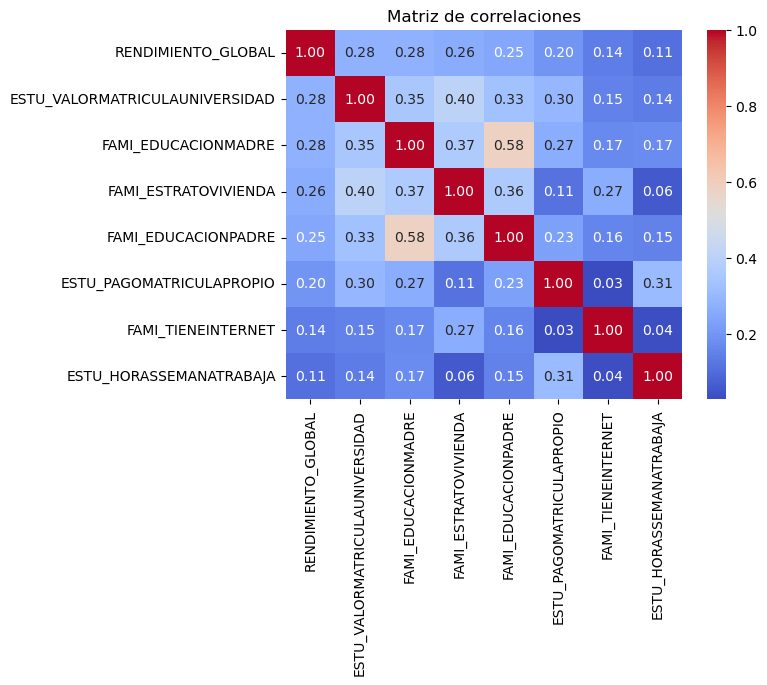

In [33]:
corr_matrix = np.abs(train.corr())
top = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)[0:8].index
corr_matrix = corr_matrix.loc[top, top]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlaciones")
plt.show()

Es importante notar aqui al final que los valores obtenidos de correlacion han mejorado respecto a la exploración, esto puede ser en gran medida porque los valores fueron tratados de mejor manera por lo que puede que los pesos de cada valor tengan un mayor sentido.

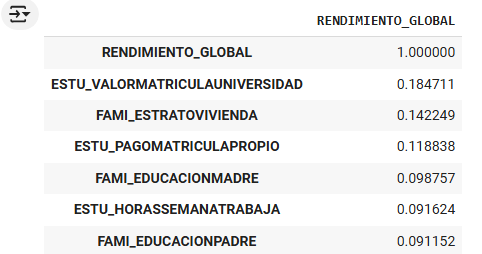
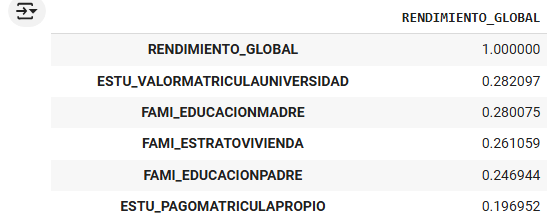

Por ultimo exportamos los datos

In [34]:
train.to_csv("preprocesados.csv", index=False)

ENTRENAMIENTO DEL MODELO Y METRICAS

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,train_test_split,cross_validate, ShuffleSplit,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,average_precision_score,mean_absolute_error,r2_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import LinearSVC
import textwrap
from itertools import product
from sklearn.metrics import f1_score,accuracy_score,recall_score


In [36]:
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    f1_ts_score = z['test_score']
    f1_tr_score = z['train_score']
    
    print("f1 Test: ", "{:.5f}".format(np.mean(f1_ts_score)), "(±", "{:.8f}".format(np.std(f1_ts_score)),")")
    print("f1 Train: ", "{:.5f}".format(np.mean(f1_ts_score)), "(±", "{:.8f}".format(np.std(f1_ts_score)),")")

In [37]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred): 
    return f1_score(y_actual, y_pred,average="weighted")

In [38]:
X = train.drop(['RENDIMIENTO_GLOBAL'],axis = 1)
y = train['RENDIMIENTO_GLOBAL'].values

In [39]:
#--------Partición de los datos------------

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(692500, 39) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 39) (207750, 39)


In [40]:
Modelo2 = LinearSVC(max_iter=5000)
Modelo3= RandomForestClassifier(n_estimators = 2,max_depth = 5)

In [41]:
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    F1= f1_score(y_test, y_pred,average="weighted")
    recall = recall_score(y_test,y_pred,average="weighted")
    
    result_df = pd.DataFrame(
        data=[[model_name, rmse, r2 , accuracy, F1 ,recall]],
        columns=["Model",'RMSE', 'R2 Score', "Accuracy", "F1 score", "Recall"]
    )
    return result_df

train_test_evaluate("SVR",Modelo2,Xtv,ytv,Xts,yts)


c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,SVR,1.453956,-0.679343,0.368679,0.315501,0.368679


In [42]:
train_test_evaluate("RandomForest",Modelo3,Xtv,ytv,Xts,yts)

,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,RandomForest,1.548418,-0.904642,0.342484,0.282535,0.342484


In [43]:
zscores = []
estimators = [Modelo3, Modelo2]
names=["Random Forest inicial","LinearSVR inicial"]
for i in range(len(estimators)):
    print("---------")
    z = cross_validate(estimators[i], Xtv, ytv, return_train_score=True, return_estimator=False,
                       scoring='f1_weighted', cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(z['test_score']))
    if i==0:
        estimators[i].fit(Xtv, ytv)
        result_df= train_test_evaluate(names[i], estimators[i], Xtv, ytv, Xts, yts)
    else:
        estimators[i].fit(Xtv, ytv)
        df1=train_test_evaluate(names[i], estimators[i], Xtv, ytv, Xts, yts)
        result_df=pd.concat([result_df,df1],ignore_index=True)

    
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
f1 Test:  0.31937 (± 0.01889472 )
f1 Train:  0.31937 (± 0.01889472 )
---------


c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress th

f1 Test:  0.31479 (± 0.00273333 )
f1 Train:  0.31479 (± 0.00273333 )


c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sherlyn\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Seleccionado:  1

 Mejor modelo: 
LinearSVC(max_iter=5000)


In [45]:

parametros = {
    "n_estimators": list(range(20, 41, 20)),
    "max_depth": list(range(11, 20, 2)),
    "min_samples_leaf": list(range(1, 3)),
    "random_state": [23]
}

forest_reg = GridSearchCV(estimator = Modelo3,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'f1_weighted',
                        verbose = 2,
                        n_jobs=-1)
forest_reg.fit(Xtv, ytv)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestClassifier(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2], 'n_estimators': [20, 40],
                         'random_state': [23]},
             scoring='f1_weighted', verbose=2)

In [46]:
Rdm_forest = RandomForestClassifier(n_estimators =forest_reg.best_params_["n_estimators"]
                                    ,max_depth = forest_reg.best_params_["max_depth"]
                                    ,min_samples_leaf=forest_reg.best_params_["min_samples_leaf"],
                                    random_state=forest_reg.best_params_["random_state"])

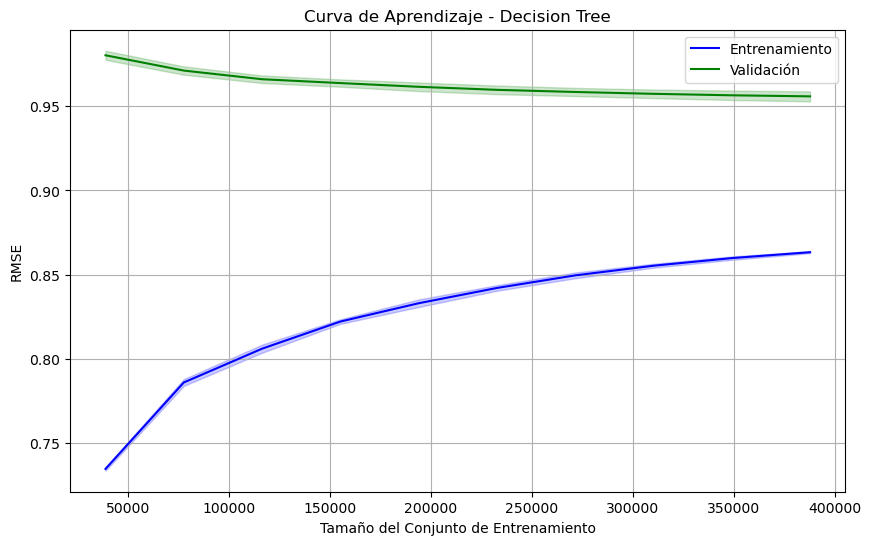

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    Rdm_forest, Xtv, ytv, cv=5, scoring='neg_log_loss', #funcion de perdida de crossentropia
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_crosse = -train_scores
test_crosse = -test_scores

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))

plt.plot(train_sizes, train_crosse.mean(axis=1), label="Entrenamiento", color='blue')
plt.plot(train_sizes, test_crosse.mean(axis=1), label="Validación", color='green')
plt.fill_between(train_sizes, train_crosse.mean(axis=1) - train_crosse.std(axis=1), 
                 train_crosse.mean(axis=1) + train_crosse.std(axis=1), alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_crosse.mean(axis=1) - test_crosse.std(axis=1), 
                 test_crosse.mean(axis=1) + test_crosse.std(axis=1), alpha=0.2, color='green')

plt.title('Curva de Aprendizaje - Decision Tree')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('cross entropy loss')
plt.legend()
plt.grid(True)
plt.show()